# Customer Segmentation Using Mall Data


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

## Exploratory Analysis 

In [3]:
df = pd.read_csv(r'C:\Users\BK\Desktop\Kaggle Data\Mall Data\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape


(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


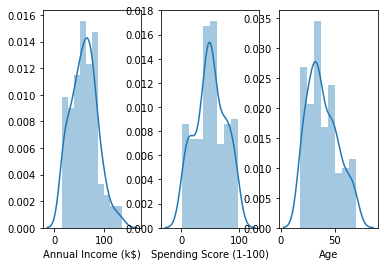

In [7]:
# df.hist()
f, axes = plt.subplots(1, 3)
sns.distplot(df["Annual Income (k$)"],ax=axes[0])
sns.distplot(df["Spending Score (1-100)"],ax=axes[1])
sns.distplot(df["Age"],ax=axes[2])

# sns.boxplot(  y="b", x= "a", data=df,  orient='v' , ax=axes[0])
# sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])

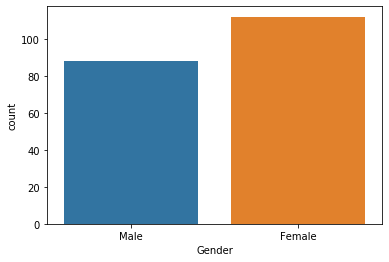

In [8]:
sns.countplot(df.Gender)

## Inspect Data For Any Relationships Between Attributes

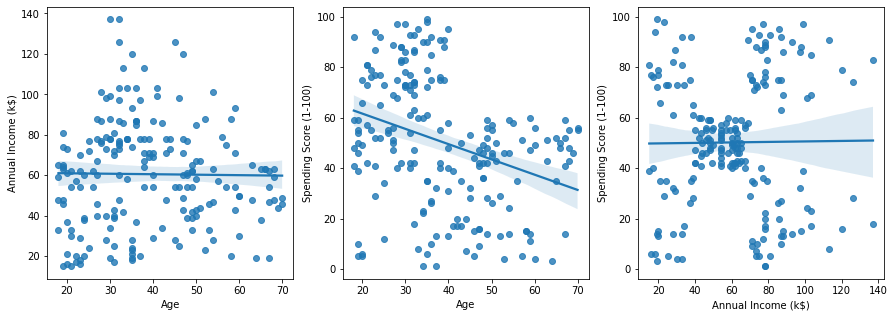

In [9]:
fig_dims = (15, 5)
fig, axes = plt.subplots(1, 3,figsize=fig_dims)

def bivariate_subplot():
    count=0
    for x in range(1,len(df.columns)):
       for y in range(x+1,len(df.columns)):

            if df.dtypes[x]!='int64' or df.dtypes[y]!='int64':
                continue
            else:
                sns.regplot(x=df.columns[x], y=df.columns[y], data=df,ax=axes[count])
                count+=1
bivariate_subplot()

In [10]:
#DISTRIBUTION PLOT


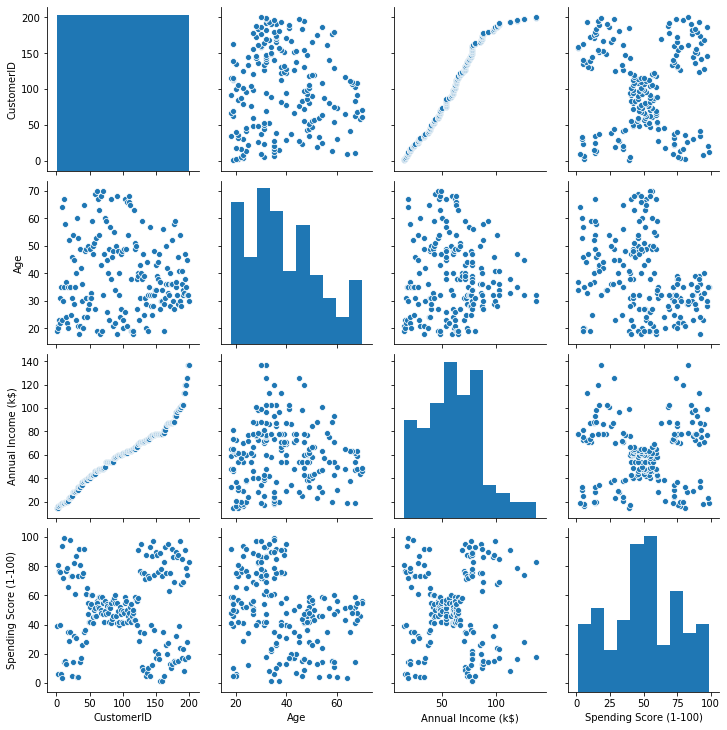

In [11]:
sns.pairplot(df)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


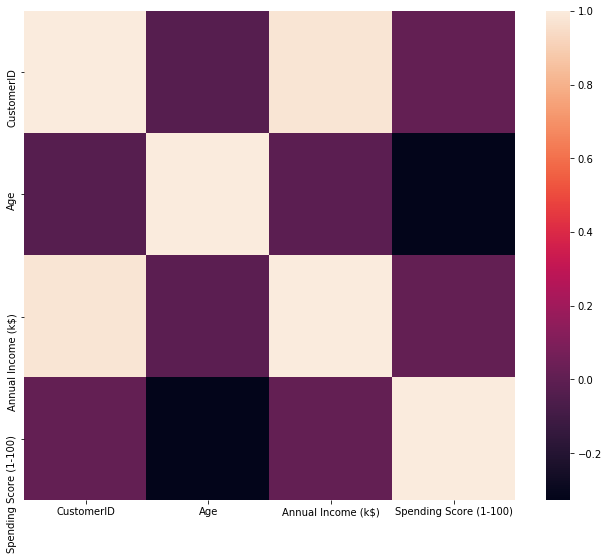

In [12]:
corr=df.corr()
print(corr)
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)

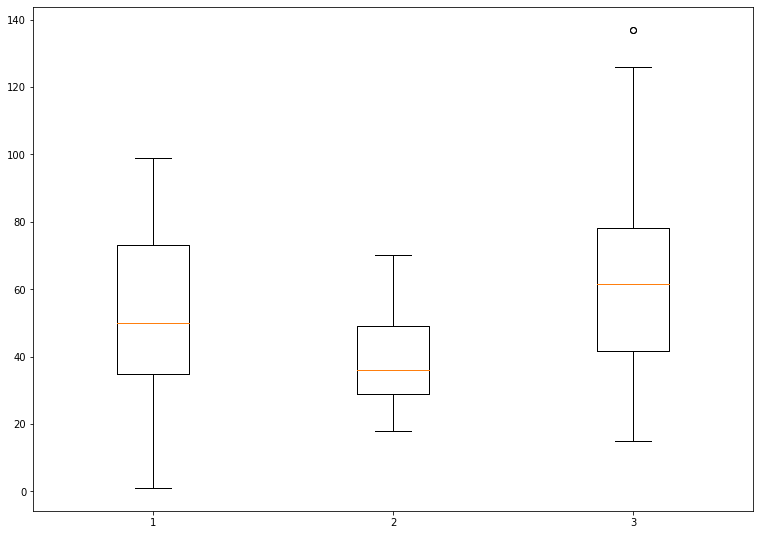

In [13]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot([df['Spending Score (1-100)'],df.Age,df['Annual Income (k$)']]) 
  
# show plot 
plt.show() 

## 2 Dimensional Clustering, Using Elbow Method To Determine Clusters, and KMeans Algorithm

In [66]:
X=df[['Spending Score (1-100)','Age']].values


In [16]:
distortions=[]
K= range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)


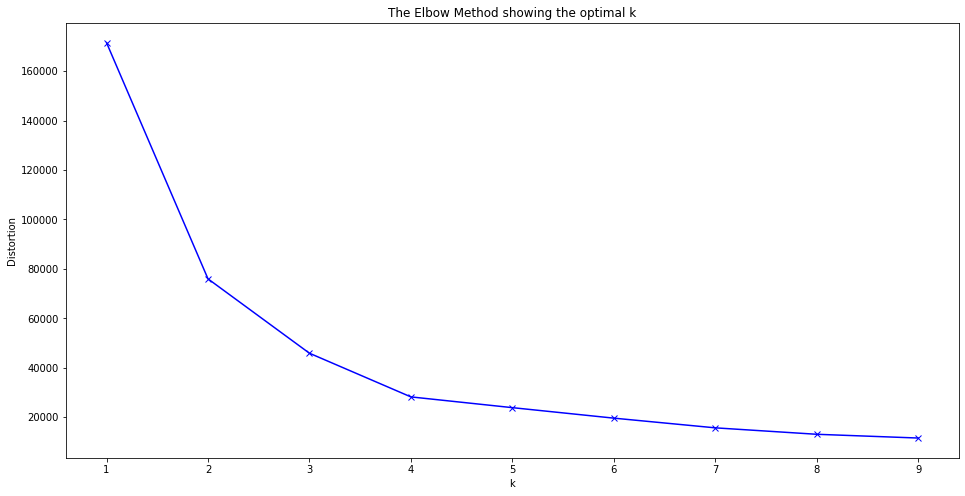

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
Kmeanfinal=KMeans(n_clusters=4)
Kmeanfinal.fit(X)
labels = Kmeanfinal.labels_
centroids = Kmeanfinal.cluster_centers_

In [19]:
centroids

array([[49.14893617, 27.61702128],
       [82.35087719, 30.1754386 ],
       [15.02083333, 43.29166667],
       [48.22916667, 55.70833333]])

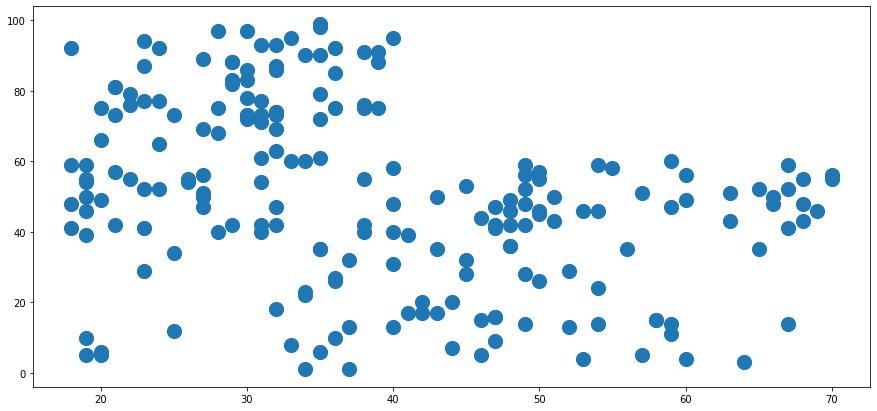

In [20]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df ,
            s = 200 )

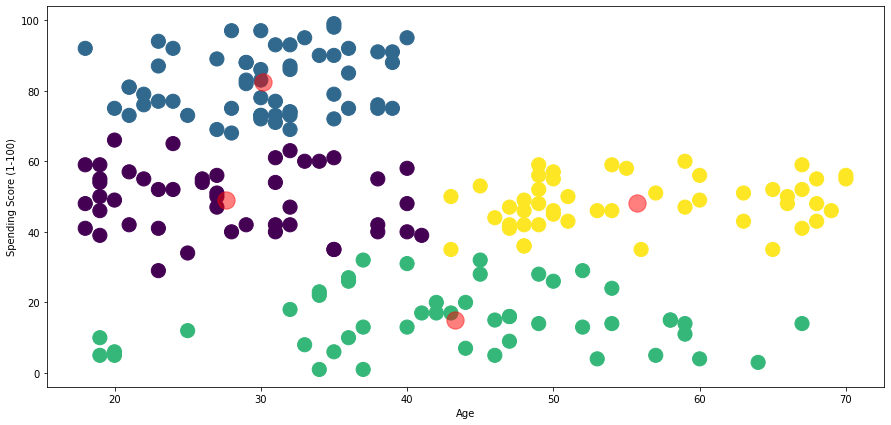

In [21]:

plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c=labels,
            s = 200 )
plt.scatter(x = centroids[: , 1] , y =  centroids[: , 0] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()



In [68]:
X1=X=df[['Spending Score (1-100)','Annual Income (k$)']].values


In [23]:
Kmeanfinal2=KMeans(n_clusters=5)
Kmeanfinal2.fit(X)
labels2 = Kmeanfinal2.labels_
centroids2 = Kmeanfinal2.cluster_centers_

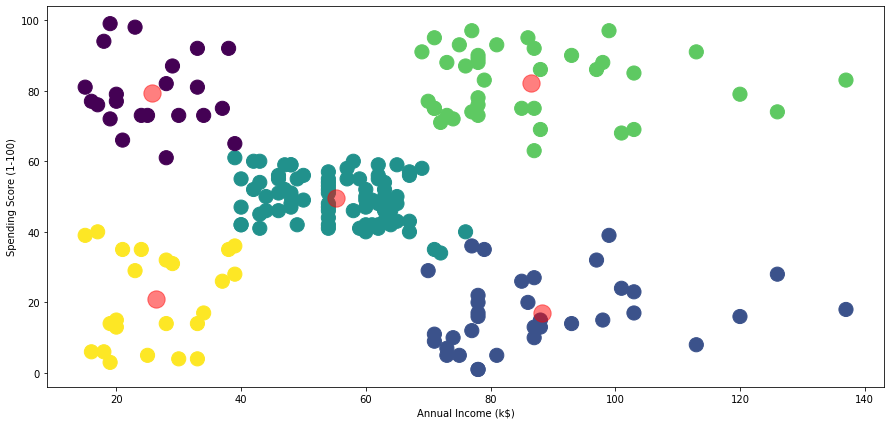

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 1] , y =  centroids2[: , 0] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()


## 3 Dimensional Analysis using Age, Annual Income, and Spending Score. 

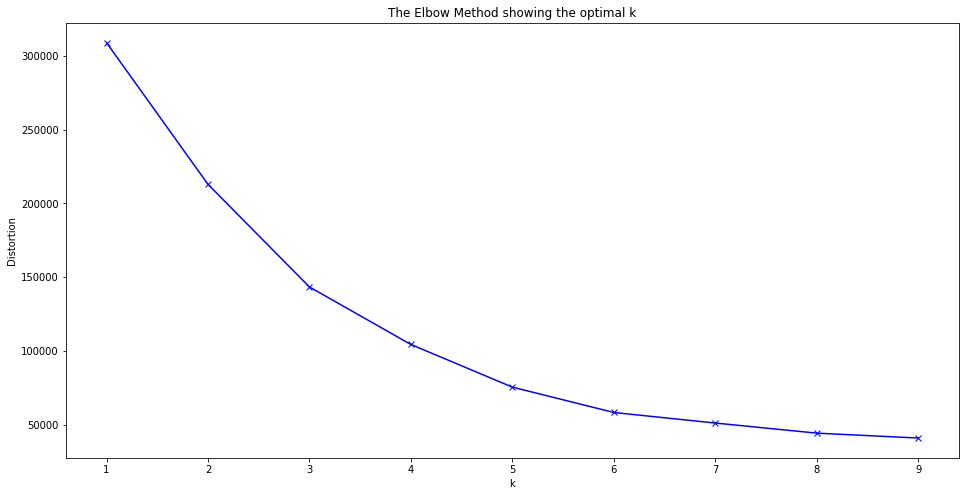

In [60]:
distortions=[]
K= range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [59]:
X2=df[['Spending Score (1-100)','Age','Annual Income (k$)']].values
X2
Kmeanfinal2=KMeans(n_clusters=4)
Kmeanfinal2.fit(X2)
labels2 = Kmeanfinal2.labels_
centroids2 = Kmeanfinal2.cluster_centers_

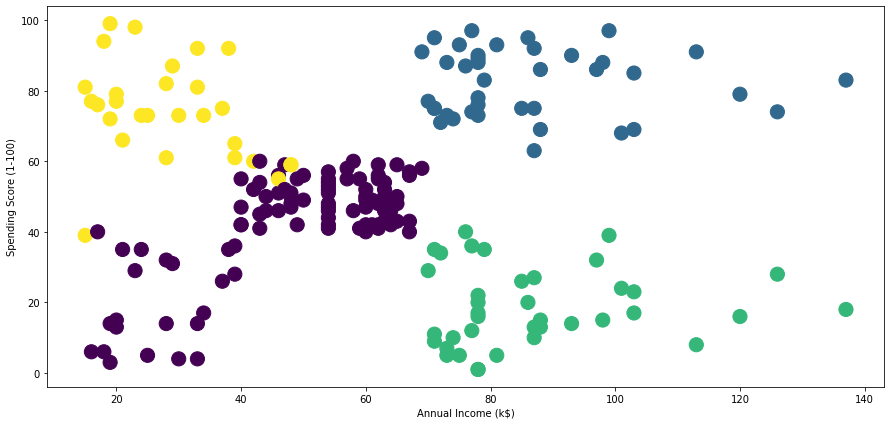

In [70]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()


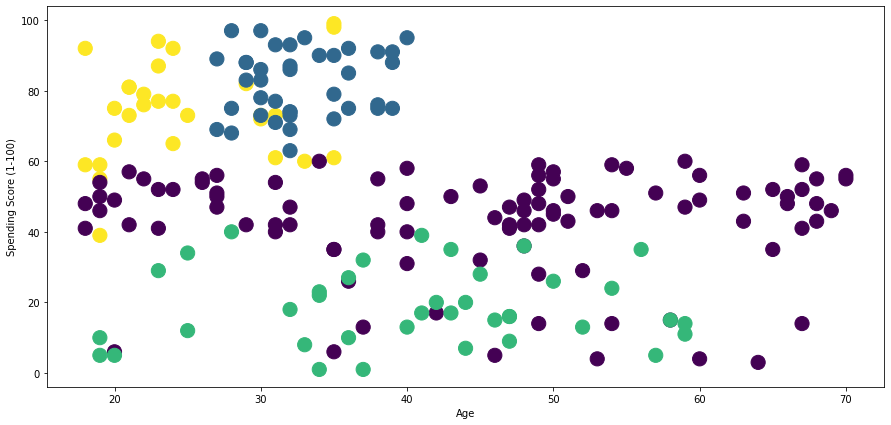

In [69]:
plt.figure(1 , figsize = (15 , 7) )
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()




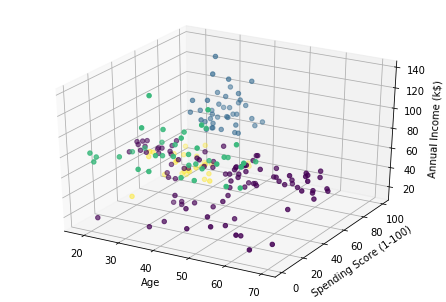

In [63]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

# Generate the values
x= df['Age']
y= df['Spending Score (1-100)']
z= df['Annual Income (k$)']

# Plot the values
ax.scatter(x, y, z, c = labels2, marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

plt.show()

In [64]:
df["labels"]=labels2
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [65]:
clusters=df[['Spending Score (1-100)','Age','Annual Income (k$)','labels','Gender']]
demographic=clusters.groupby(['Gender','labels']).mean().transpose()
demographic.head()

Gender                     Female                                        Male  \
labels                          0          1          2          3          0   
Spending Score (1-100)  42.728814  81.666667  23.722222  79.142857  42.472222   
Age                     42.101695  32.190476  41.388889  25.857143  49.472222   
Annual Income (k$)      48.355932  86.047619  89.055556  26.642857  49.277778   

Gender                                               
labels                          1      2          3  
Spending Score (1-100)  82.666667  14.05  69.357143  
Age                     33.277778  39.50  23.785714  
Annual Income (k$)      87.111111  85.15  30.785714

## Customer Demographic Segmentation Results:
### 0=Early 40's - late 30's with lower annual income with moderate spending
### 1= Early 30's with high annual income and high spending
### 2= Mid 20's with low annual income and high spending
### 3=  Early 40's - late 30's with high income and low spending
